<a href="https://colab.research.google.com/github/MLMasters/DroughtDetection/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drought Data Exploration
First create symbolic link to our data folder on My Drive.

In [1]:
!ln -s drive/My\ Drive/data
!ls

data  drive  sample_data


## Load and display data

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [63]:
def load_part_file(file):
  dataset = tf.data.TFRecordDataset(file)
  data = dataset.as_numpy_iterator()
  l = []
  for b in data:
    l.append(tf.train.Example.FromString(b))
  return np.array(l)

In [65]:
dataset.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [3]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
validation_files = dirlist('data/val/')

In [4]:
dataset = tf.data.TFRecordDataset(validation_files[0])

In [5]:
iterator = dataset.as_numpy_iterator()

In [6]:
next(iterator)

b'\n\x83\xed\x02\n\x8e!\n\x02B1\x12\x87!\n\x84!\n\x81!"!!""!!       !!!!!!!!!!""""""!!!!!!"!!     !""!! !  ! !         "!"#"!!!! !    !!!!!!!!"!"!!!""!!!!!! !     !!"!!!!!!!!!!!!   !! """#"!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!     !!!!!!!!!!!!!!!!!!!!!!""#"!!!!!!!!!!  !!!! !!!!!!!!!!!!!""!! ! !!!!!!!!!!"!!!"!!"!!"!! "###"! !""!    !!!!!!!!!!""!!!!""!""!! ! !!!!!!!"""!!!"!!!"! !!!!"##""!!""!!    !!!!!!!!!!!!!!!"""""!!!   !!!!"!""!!""!"""!!!!!! """""""""!!     "!!""!!!!!"!!!!!"#"""!!   !!"!"!""!!!!!!"!!!!!!!!!"""""""!!   ! \x1f ! !"!!""!"!!!! !""""!!! !!!"!!"""!! !!!!!!! !!!  !"""""!!      \x1f !!!!"""#""""""!""""""!"!!!!"""""!!! !!!!!!!!!!!  ""#"""!!       !!  !""#""##""""""#!!"""!""!""#"""!!!!"!"!!!!!!  """"""!!!!    \x1f     """""!!"""""#""""!!!!"!""###""!!!""""!!!!!!!!"#""""!!!  \x1f  \x1f     "!!!!!!""""""!""!"""!!!"#"#""""!"""!!!!!!!!!!"""""!!!!  \x1f   \x1f   !!!!!!!!!"""""""""""""#""""""#"""""""""!!!!!!!""""""!!!      \x1f\x1f !!!!!!!!!!"""!"!""!"""##"!#""""""##"""""!"!!!!!!""""!   

In [47]:
parsed = tf.train.Example.FromString(next(iterator))

In [48]:
parsed.features.feature['B4'].bytes_list

value: "5310-.//.**+)*\'\"-*,+/10//08:941.,-20/00/.37861.++)&!\036\035\034\034\034\035\035\034\034\034\035\034\0355521/-/.--,*)(&$,)**0100//7:8640---)*,,*,/2420,))*&!\037\035\035\035\034\034\033\033\034\034\036\035\03356201//0.-,+*+)&\')+,10,-039:6652/-,*(\'(*,-/1..*(&(&\" \036\035\034\033\033\033\032\033\033\035\034\034542020/1/-,,++)%\'+-041,./5:866442/-,)&$\"\'(+,,)&$\" \037\036\036\035\034\033\033\034\033\034\034\033\033\033\03353222/020+**+))%(*,043-.17<76423422,++\'!\"#\"#\"! \037\036\035\034\034\033\033\033\034\035\035\034\035\034\033\033\032\03244431112.-+(*))\'\'+.2320038=862/3752.,,*(&%\" \037\037\036\036\036\035\034\034\033\033\034\033\033\033\034\034\034\033\033\033\0333352/222.,*))(()(,11320//2:852467750.-,)(*(\'%##!! \036\036\035\035\034\034\033\034\035\035\035\034\034\035\03644554231.-,*(&&&\',/021/,+3;87556572..,+*+-,*(\'\'& \037\037\037\035\036\035\035\035\036\036\036\036\036\035\037\03754464230.-,*(*)%#+/130-+,5956624561/..-+./.*\'\'\')$#!\037\036\037\036\035\035\035\

In [49]:
def get_img(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example.features.feature[band].bytes_list.value[0], dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed.features.feature['label'].int64_list.value[0], tf.int32).numpy()
        
    return rgbArray, label

In [50]:
rgb, l = get_img(parsed)

Text(0.5, 1.0, '0')

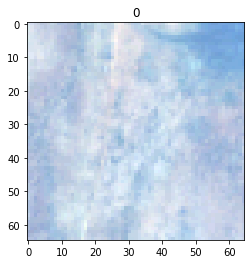

In [51]:
plt.imshow(rgb)
plt.title(l)